<a href="https://colab.research.google.com/github/Developer1503/parkinson-disease-prediction-using-ml/blob/main/Copy_of_Copy_of_Project2_Parkinson's_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


Data Collection & Analysis

In [5]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [6]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [8]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [10]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Histogram: To show the distribution of numeric features.

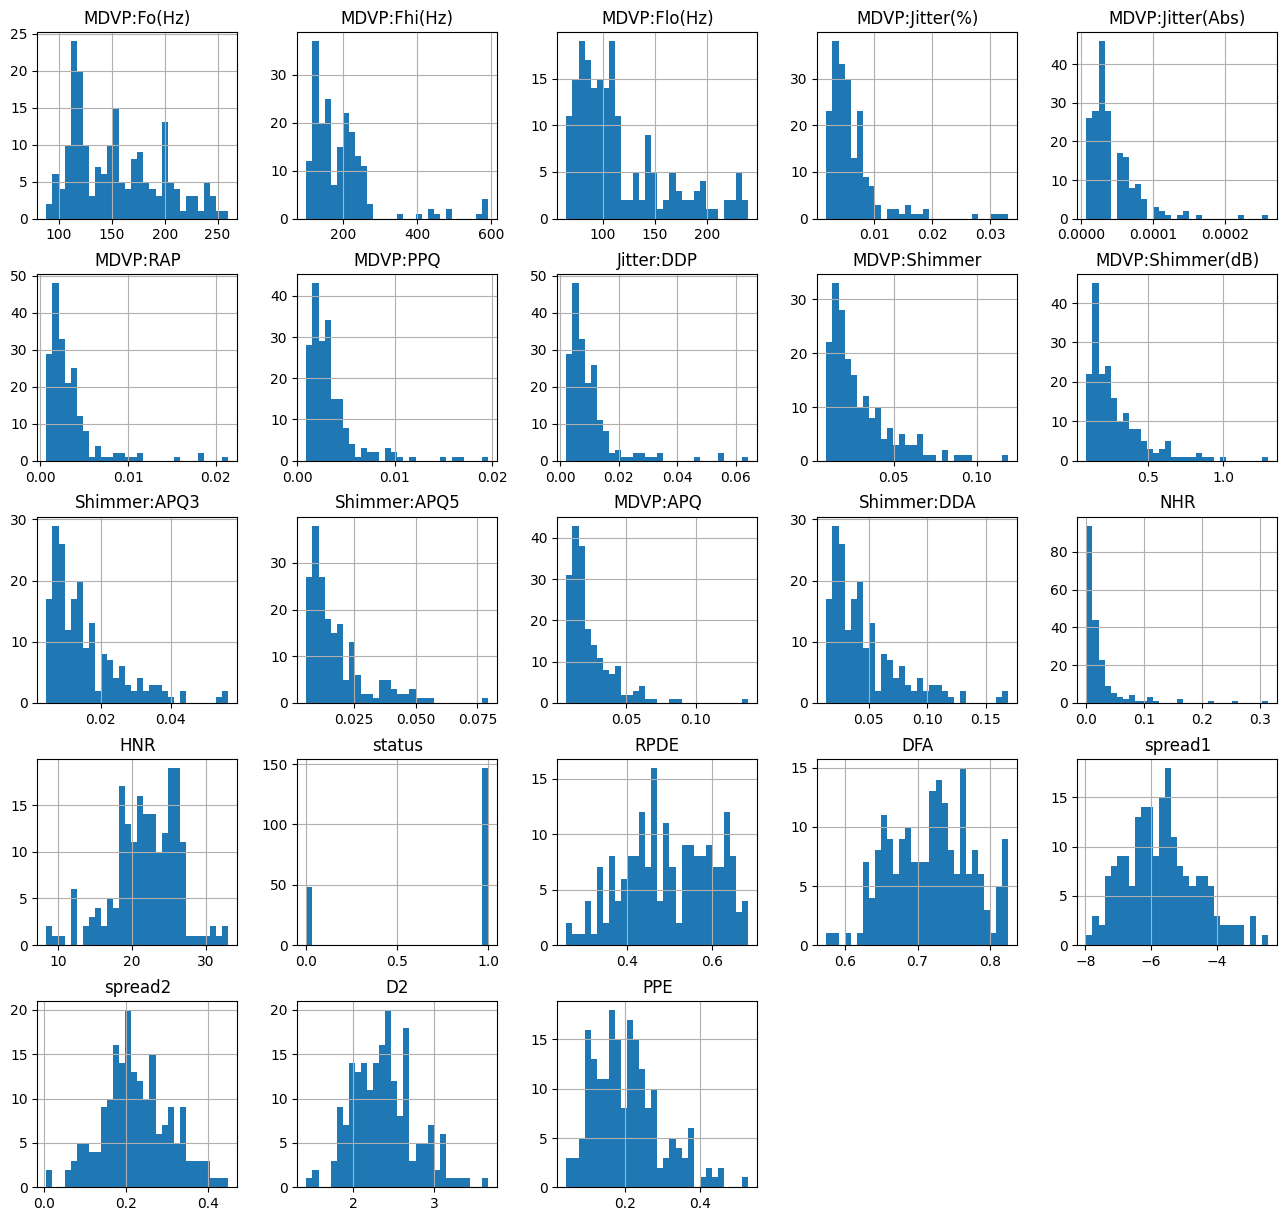

In [11]:
parkinsons_data.hist(bins=30, figsize=(16,15))
plt.show()



\

:

In [12]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

,count
status,
1,147
0,48


1  --> Parkinson's Positive

0 --> Healthy


In [13]:

# Group the data by 'status' and calculate the mean for numeric columns, excluding the 'name' column
parkinsons_data_numeric = parkinsons_data.drop(columns=['name'])
grouped_data = parkinsons_data_numeric.groupby('status').mean()


Data Pre-Processing

Separating the features & Target

In [14]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [15]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Heatmap viualization

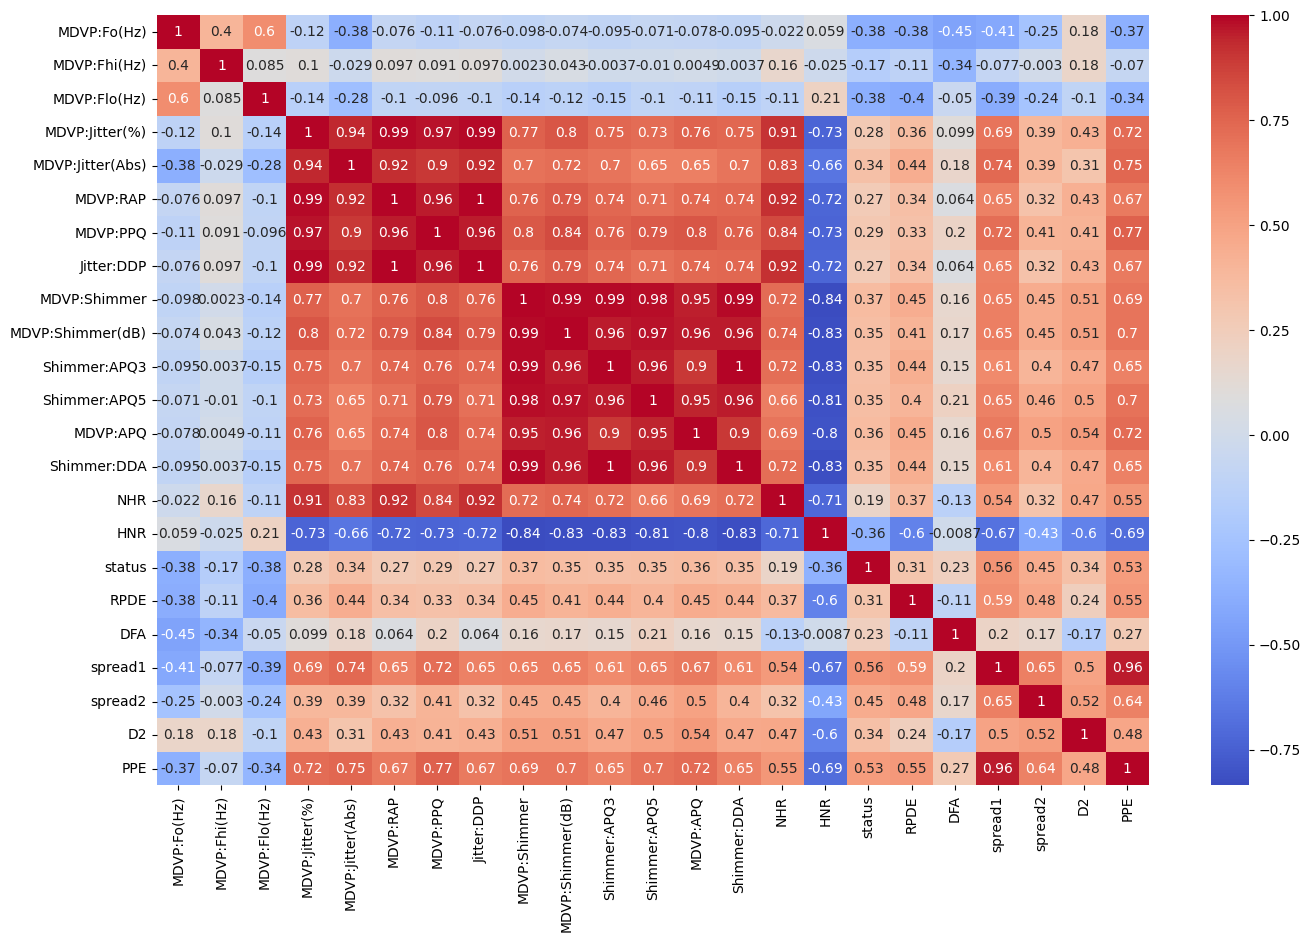

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_data = parkinsons_data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
plt.figure(figsize=(16,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


Model Training

Model Training (SVM)

In [18]:
model = svm.SVC(kernel='linear')

In [19]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Training (Decision Tree)

In [20]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)  # Note: Decision Trees don't require scaled input


DecisionTreeClassifier(random_state=42)

Model Evaluation

Accuracy Score

In [21]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'status' is the target variable and the rest are features
X = parkinsons_data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns
y = parkinsons_data['status']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (assuming you've already defined your model, e.g., SVM or Logistic Regression)
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate the accuracy for the training data
training_data_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy score
print('Accuracy score of training data: ', training_data_accuracy)


Accuracy score of training data:  0.8653846153846154


In [22]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [23]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


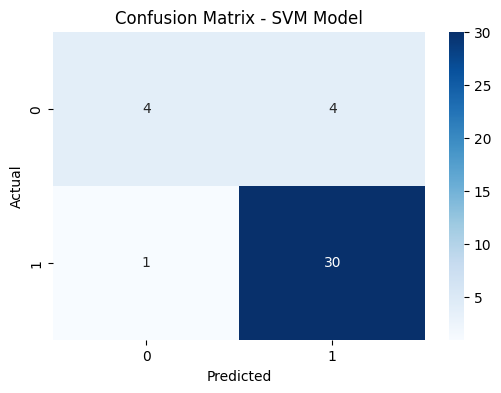

In [24]:
#svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting on the test data
y_test_pred_svm = model.predict(X_test)

# Generate the confusion matrix
cm_svm = confusion_matrix(Y_test, y_test_pred_svm)

# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()


Decision tree

In [25]:

dt_model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, Y_train)


DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [28]:
dt_train_accuracy = accuracy_score(Y_train, dt_model.predict(X_train))
dt_test_accuracy = accuracy_score(Y_test, y_test_pred_dt)
print(f'Training Accuracy: {dt_train_accuracy}')
print(f'Test Accuracy: {dt_test_accuracy}')


Training Accuracy: 0.9743589743589743
Test Accuracy: 0.7692307692307693


FEATURE IMPORTANCE

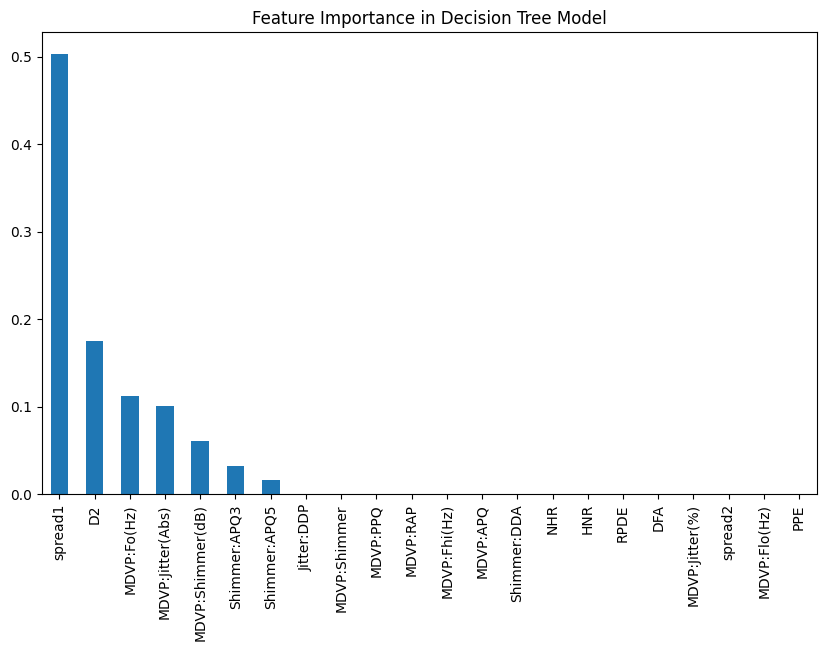

In [35]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


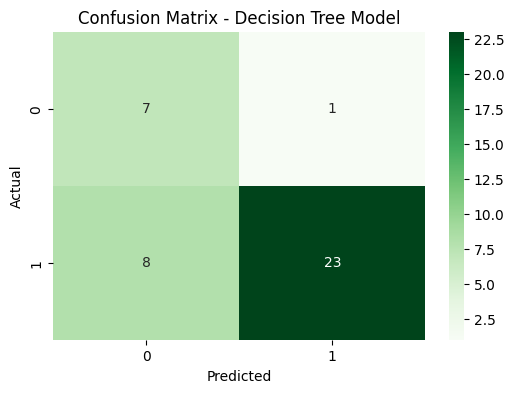

In [29]:
#Decision tree
# Predicting on the test data
y_test_pred_dt = dt_model.predict(X_test)

# Generate the confusion matrix
cm_dt = confusion_matrix(Y_test, y_test_pred_dt)

# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()


ROC CURVE

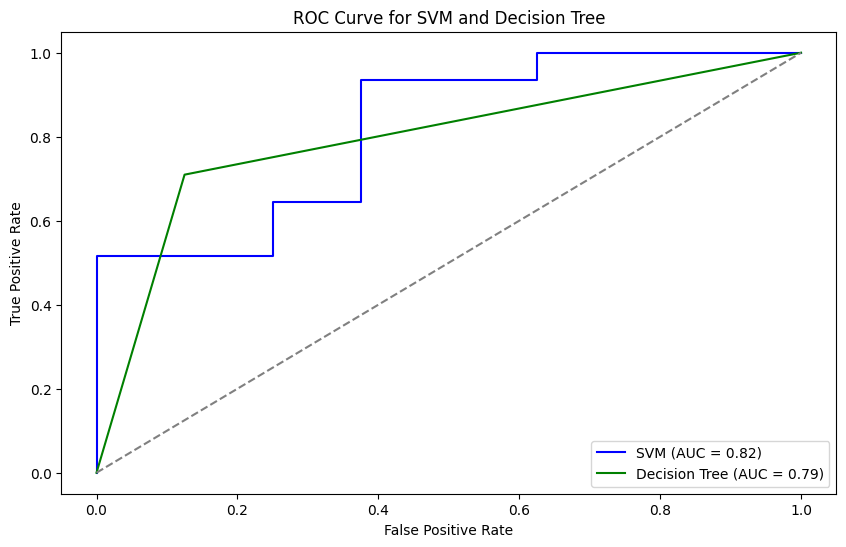

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Loading and preparing the dataset (assuming dataset is pre-loaded as 'parkinsons_data')
X = parkinsons_data.drop(columns=['name', 'status'])
Y = parkinsons_data['status']

# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SVM Model with probability prediction
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train, Y_train)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=2)
dt_model.fit(X_train, Y_train)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(Y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(Y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM and Decision Tree')
plt.legend(loc='lower right')
plt.show()


PRECISION-RECALL FOR SVM AND DECISION TREE

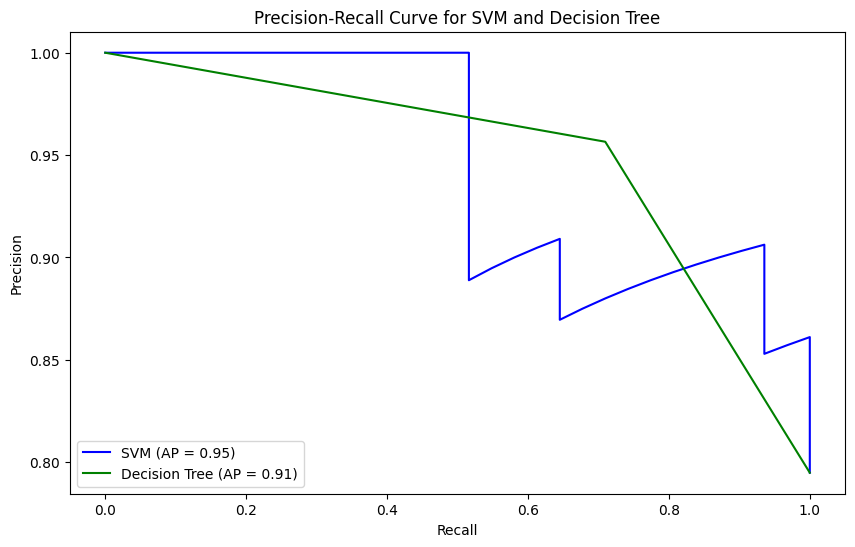

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall for SVM
precision_svm, recall_svm, _ = precision_recall_curve(Y_test, svm_probs)
average_precision_svm = average_precision_score(Y_test, svm_probs)

# Precision-Recall for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(Y_test, dt_probs)
average_precision_dt = average_precision_score(Y_test, dt_probs)

# Plotting Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_svm, precision_svm, color='blue', label=f'SVM (AP = {average_precision_svm:.2f})')
plt.plot(recall_dt, precision_dt, color='green', label=f'Decision Tree (AP = {average_precision_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM and Decision Tree')
plt.legend(loc='lower left')
plt.show()


CROSS VALIDATION FOR SVM AND DECISION TREE

In [33]:
from sklearn.model_selection import cross_val_score

# Cross-validation accuracy for SVM
svm_cv_scores = cross_val_score(svm_model, X, Y, cv=5, scoring='accuracy')
print("SVM Cross-Validation Accuracy:", svm_cv_scores.mean())

# Cross-validation accuracy for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X, Y, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy:", dt_cv_scores.mean())


SVM Cross-Validation Accuracy: 0.8256410256410256
Decision Tree Cross-Validation Accuracy: 0.8


Building a Predictive System

In [ ]:
# Predictions on training data
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)

# Predictions on test data
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.8782
Test Accuracy: 0.5897


In [ ]:

# Input data for prediction
input_data = {
    'MDVP:Fo(Hz)': 197.07600,
    'MDVP:Fhi(Hz)': 206.89600,
    'MDVP:Flo(Hz)': 192.05500,
    'MDVP:Jitter(%)': 0.00289,
    'MDVP:Jitter(Abs)': 0.00001,
    'MDVP:RAP': 0.00166,
    'MDVP:PPQ': 0.00168,
    'Jitter:DDP': 0.00498,
    'MDVP:Shimmer': 0.01098,
    'MDVP:Shimmer(dB)': 0.09700,
    'Shimmer:APQ3': 0.00563,
    'Shimmer:APQ5': 0.00680,
    'MDVP:APQ': 0.00802,
    'Shimmer:DDA': 0.01689,
    'NHR': 0.00339,
    'HNR': 26.77500,
    'RPDE': 0.422229,
    'DFA': 0.741367,
    'spread1': -7.348300,
    'spread2': 0.177551,
    'D2': 1.743867,
    'PPE': 0.085569
}

# Creating a DataFrame from the input data
input_data_df = pd.DataFrame([input_data])

# Standardize the input data using the previously fitted scaler
std_data = scaler.transform(input_data_df)

# Make predictions using the SVM model
svm_prediction = model.predict(std_data)

# Make predictions using the Decision Tree model
dt_prediction = dt_model.predict(std_data)

# Output prediction results
if svm_prediction[0] == 0:
    print("SVM Model: The Person does not have Parkinson's Disease")
else:
    print("SVM Model: The Person has Parkinson's Disease")

if dt_prediction[0] == 0:
    print("Decision Tree Model: The Person does not have Parkinson's Disease")
else:
    print("Decision Tree Model: The Person has Parkinson's Disease")


SVM Model: The Person does not have Parkinson's Disease
Decision Tree Model: The Person does not have Parkinson's Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
